In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('city_day.csv')

In [3]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
df.shape

(29531, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [6]:
df['AQI_Bucket']

0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN
             ...     
29526            Good
29527    Satisfactory
29528    Satisfactory
29529    Satisfactory
29530            Good
Name: AQI_Bucket, Length: 29531, dtype: object

In [7]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [8]:
df['AQI_Bucket'].value_counts()

Moderate        8829
Satisfactory    8224
Poor            2781
Very Poor       2337
Good            1341
Severe          1338
Name: AQI_Bucket, dtype: int64

In [9]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [10]:
df.dropna(subset = ['AQI'], inplace = True)
df = df.drop(columns = ['Xylene', 'City', 'Date'], axis = 1)

In [11]:
df.shape

(24850, 13)

In [12]:
df.isnull().sum()

PM2.5          678
PM10          7086
NO             387
NO2            391
NOx           1857
NH3           6536
CO             445
SO2            605
O3             807
Benzene       3535
Toluene       5826
AQI              0
AQI_Bucket       0
dtype: int64

In [13]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
si = SimpleImputer()
le = LabelEncoder()

In [14]:
columns = df.columns

In [15]:
X = df.drop('AQI_Bucket', axis = 1)
Y = df['AQI_Bucket']

In [16]:
X = si.fit_transform(X)
X = pd.DataFrame(X, columns = columns[0:12])
X.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
0,83.13,118.454435,6.93,28.71,33.72,23.848366,6.93,49.52,59.76,0.02,0.00,209.0
1,79.84,118.454435,13.85,28.68,41.08,23.848366,13.85,48.49,97.07,0.04,0.00,328.0
2,94.52,118.454435,24.39,32.66,52.61,23.848366,24.39,67.39,111.33,0.24,0.01,514.0
3,135.99,118.454435,43.48,42.08,84.57,23.848366,43.48,75.23,102.70,0.40,0.04,782.0
4,178.33,118.454435,54.56,35.31,72.80,23.848366,54.56,55.04,107.38,0.46,0.06,914.0


In [17]:
X.isnull().sum()

PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
AQI        0
dtype: int64

In [18]:
X.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
count,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000
mean,67.476613,118.454435,17.622421,28.978391,32.289012,23.848366,2.345267,14.362933,34.912885,3.458668,9.525714,166.463581
std,62.208948,75.660357,22.245859,24.432532,29.542967,22.213762,7.011570,17.215217,21.368849,14.851646,18.269981,140.696585
min,0.040000,0.030000,0.030000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,13.000000
25%,29.560000,71.780000,5.720000,12.090000,14.030000,11.280000,0.590000,5.790000,19.640000,0.340000,1.580000,81.000000
50%,50.165000,118.454435,10.075000,22.535000,25.720000,23.848366,0.950000,9.430000,32.060000,1.810000,6.790000,118.000000
75%,79.507500,122.957500,19.710000,37.910000,38.170000,24.710000,1.530000,14.890000,45.397500,3.458668,9.525714,208.000000
max,914.940000,917.080000,390.680000,362.210000,378.240000,352.890000,175.810000,186.080000,257.730000,455.030000,454.850000,2049.000000


In [19]:
Y = le.fit_transform(Y)
Y

array([2, 5, 4, ..., 3, 3, 0])

In [20]:
correlation = df.corr()

<AxesSubplot:>

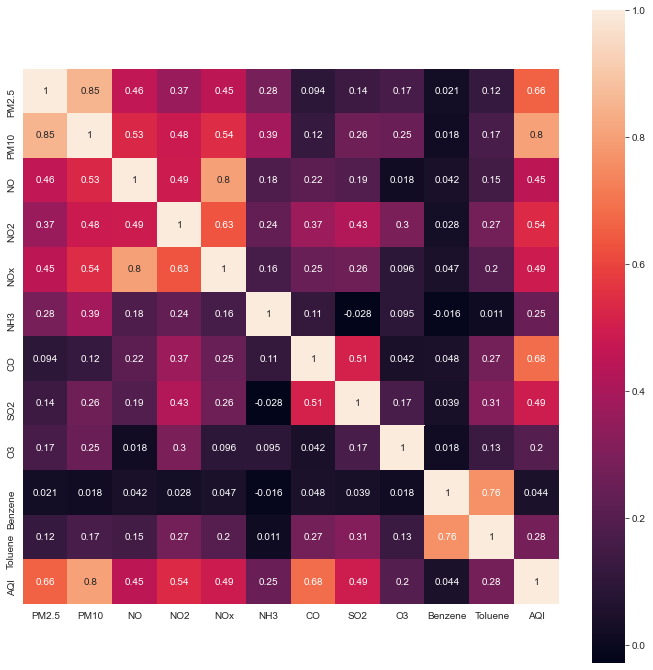

In [21]:
plt.figure(figsize = (12,12))
sns.set_style(style = 'darkgrid')
sns.heatmap(correlation, annot = True, square = True)

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns = columns[0:12])
X.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
0,0.090819,0.129136,0.017663,0.079238,0.089150,0.067554,0.039418,0.266083,0.231841,0.000044,0.000000,0.096267
1,0.087223,0.129136,0.035377,0.079155,0.108608,0.067554,0.078778,0.260547,0.376610,0.000088,0.000000,0.154715
2,0.103268,0.129136,0.062358,0.090144,0.139092,0.067554,0.138729,0.362122,0.431942,0.000527,0.000022,0.246071
3,0.148595,0.129136,0.111225,0.116151,0.223588,0.067554,0.247312,0.404256,0.398456,0.000879,0.000088,0.377701
4,0.194874,0.129136,0.139588,0.097460,0.192470,0.067554,0.310335,0.295749,0.416615,0.001011,0.000132,0.442534


Train test split

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = .2, random_state = 0)

In [24]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [25]:
support = SVC()
forest= RandomForestClassifier()

SUPPORT VECTOR MACHINE and RANDOM FOREST CLASSIFIER training

In [26]:
models = [support, forest]
for i in models:
    i.fit(x_train, y_train) 

model prediction on training data

In [28]:
for i in models:
    train_prediction = i.predict(x_train)
    print(f'ACCURACY OF {i} MODEL :', accuracy_score(y_train, train_prediction))

ACCURACY OF SVC() MODEL : 0.9433098591549296
ACCURACY OF RandomForestClassifier() MODEL : 1.0


model prediction on testing data

In [29]:
for i in models:
    test_prediction = i.predict(x_test)
    print(f'ACCURACY OF {i} MODEL :', accuracy_score(y_test, test_prediction))

ACCURACY OF SVC() MODEL : 0.928169014084507
ACCURACY OF RandomForestClassifier() MODEL : 0.999195171026157


In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, test_prediction)
print(cm)

[[ 267    0    0    0    0    0]
 [   0 1831    0    0    0    0]
 [   0    0  538    0    0    1]
 [   0    0    0 1636    0    0]
 [   0    0    0    0  257    1]
 [   0    0    0    0    2  437]]


# predictive system

In [34]:
op_list = ['Good', 'Moderate', 'Poor', 'Satisfactory','Severe' ,'Very Poor']
input_data = input()
input_list = [float(i) for i in input_data.split(',')]
array_data = np.array(input_list)
reshaped_array = array_data.reshape(1, -1)

transformed_array = si.transform(reshaped_array)
for i in models:
    prediction = i.predict(transformed_array)
    print(f'FOR {i}')
    print(op_list[int(prediction)])

43.59,107.91,2.08,39.8,22.62,12.82,1.29,4.83,21.39,5.23,24.81,102.0
FOR SVC()
Severe
FOR RandomForestClassifier()
Severe
